<a href="https://colab.research.google.com/github/nandanidabhi/AndroidProject/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imputation of Missing Data (Group Assignment)** 


Group 6:
1. Priyanka Jadhav (801167642) pjadhav7@uncc.edu
2. Aakanksha Chauhan (801168731) achauha3@uncc.edu
3. Nandani Dabhi (801167740) ndabhi@uncc.edu

### **Dataset Introduction**

 **Diabetes Dataset**

We have used Diabetes dataset for studying and implementing Imputation of Missing Data. It was used for the prediction model of **the onset of diabetes within 5 years in given medical details**.
<br>
<br>
Below is the details about dataset:
<br>Number of attributes/predictors: **8**
<br>Number of target/ outcome variables: **1**
<br>Number of observations/records: **768** 

Following are the attributes and target variables:
0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).


#### **Load and summarize the dataset**

In [ ]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
dataset = read_csv(url, header=None)
# summarize the dataset
print(dataset.describe())

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
dataset.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
# load the dataset and review rows
from pandas import read_csv
# load the dataset
dataset = read_csv(url, header=None)
# print the first 20 rows of data
print(dataset.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [ ]:
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

#### **Example of summarizing the number of missing values for each variable**

In [ ]:
# example of summarizing the number of missing values for each variable
from pandas import read_csv
# load the dataset
dataset = read_csv(url, header=None)
# count the number of missing values for each column
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


#### **Example of marking missing values with nan values**

In [ ]:
# example of marking missing values with nan values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv(url, header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


#### **Example of review rows from the dataset with missing values marked**

In [ ]:
# example of review rows from the dataset with missing values marked
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv(url, header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# print the first 20 rows of data
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

We will try to evaluate a the Linear Discriminant Analysis (LDA) algorithm on the dataset with missing values.

This is an algorithm that does not work when there are missing values in the dataset.

The below example marks the missing values in the dataset, then attempts to evaluate LDA using 3-fold cross validation and print the mean accuracy.

#### **Example where missing values cause errors**

In [ ]:
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv(url, header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)


Remove rows with missing values:
Pandas provides the dropna() function that can be used to drop either columns or rows with missing data.

#### **Example of removing rows that contain missing values**

In [ ]:
# example of removing rows that contain missing values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv(url, header=None)
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

#### **Evaluate model on data after rows with missing data are removed**

In [ ]:
# evaluate model on data after rows with missing data are removed
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv(url, header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.788


Imputing refers to using a model to replace missing values.
There are many options we could consider when replacing a missing value, for example:
A constant value that has meaning within the domain, such as 0, distinct from all other values.
A value from another randomly selected record.
A mean, median or mode value for the column.
A value estimated by another predictive model.
We can use fillna() to replace missing values with the mean value for each column

#### **Manually impute missing values with numpy**

In [ ]:
# manually impute missing values with numpy
from pandas import read_csv
from numpy import nan
# load the dataset
dataset = read_csv(url, header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

## **Using strategy = Mean**

In [ ]:
# example of imputing missing values using scikit-learn
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
# load the dataset
dataset = read_csv(url, header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# retrieve the numpy array
values = dataset.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


The example below shows the LDA algorithm trained in the SimpleImputer transformed dataset.

We use a Pipeline to define the modeling pipeline, where data is first passed through the imputer transform, then provided to the model. This ensures that the imputer and model are both fit only on the training dataset and evaluated on the test dataset within each cross-validation fold. This is important to avoid data leakage.

## **Imputer Transformation**

In [ ]:
# example of evaluating a model after an imputer transform
from numpy import nan
from pandas import read_csv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv(url, header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# define the model
lda = LinearDiscriminantAnalysis()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.770


In [ ]:
# evaluate mean imputation and random forest for the Diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 8]
X, y = data[:, ix], data[:, 8]
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.762 (0.063)


In order to enhance the performance of our model using Linear Discriminant Analysis (LDA) we have played with number of splits for cross-validation in order to get maximum mean accuracy. For n_splits = 22 we found the best performance of mean_accuracy which is 0.770.

#### **Compare statistical imputation strategies for the Diabetes dataset**

>mean 0.761 (0.044)
>median 0.762 (0.046)
>most_frequent 0.763 (0.045)
>constant 0.765 (0.042)


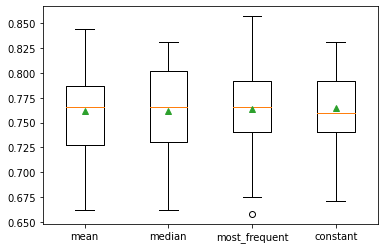

In [ ]:
# compare statistical imputation strategies for the Diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 8]
X, y = data[:, ix], data[:, 8]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

ValueError: ignored

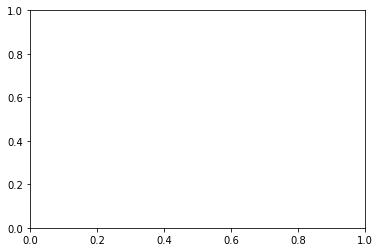

In [ ]:
# compare statistical imputation strategies for the Diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 8]
X, y = data[:, ix], data[:, 8]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
  x_labels = [5,10,15,20]
  scores=[]
	# create the modeling pipeline
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	# evaluate the model
  cv5 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  cv10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv15 = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
  cv20 = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
  scores.append(cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv5, n_jobs=-1))
  scores.append(cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv10, n_jobs=-1))
  scores.append(cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv15, n_jobs=-1))
  scores.append(cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv20, n_jobs=-1))
  pyplot.plot(x_labels,scores)
  plt.show()
	# store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
#pyplot.boxplot(results, labels=strategies, showmeans=True)
#pyplot.show()

We have used Random Forest Classifier, Cross-Validation and Simple Imputer and compared the results for mean, median, most_frequent and constant.
The maximum model performance can be observed for constant. The score obtained is 0.765. 